
# **CUHK-STAT3009**: Notebook - ML Method Overview

## Case study in **fetch_california_housing**

### Explore the document of the routine [sklearn.datasets.fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)

In [ ]:
## The fetch_california_housing is already installed in `sklearn`, 
## we can directly load the dataset from the library
from sklearn.datasets import fetch_california_housing
import numpy as np

california_housing = fetch_california_housing(as_frame=True)
print(dir(california_housing))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


### EDA for the dataset

- Look at the available description

In [ ]:
## check the description in the dataset

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
print(california_housing.data.sample(5).T)

                   4911        2985         5568        1141         9155
MedInc         1.220600    1.542900     4.317000    1.976600     5.598100
HouseAge      35.000000   42.000000    32.000000   19.000000    10.000000
AveRooms       3.221580    5.258216     4.369318    5.787575     5.744526
AveBedrms      1.071291    1.197183     0.933712    1.184369     1.010428
Population  2106.000000  677.000000  1754.000000  984.000000  3002.000000
AveOccup       4.057803    3.178404     3.321970    1.971944     3.130344
Latitude      34.010000   35.330000    33.880000   39.750000    34.450000
Longitude   -118.270000 -119.010000  -118.290000 -121.600000  -118.530000


- check the features in the dataset

In [ ]:
# we will take transpose to let `feats` in the row for a better display
california_housing.frame.info()
california_housing.frame.sample(5).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,595,13066,3639,2111,1808
MedInc,4.823700,2.969300,3.808300,1.799400,3.222200
HouseAge,38.000000,13.000000,41.000000,42.000000,41.000000
AveRooms,5.699387,4.452314,4.618834,4.778539,3.268293
AveBedrms,1.007669,1.029273,0.959641,1.073059,0.914634
Population,1784.000000,2420.000000,664.000000,1621.000000,198.000000
AveOccup,2.736196,2.285175,2.977578,3.700913,2.414634
Latitude,37.710000,38.540000,34.220000,36.760000,37.930000
Longitude,-122.080000,-121.320000,-118.440000,-119.740000,-122.350000
MedHouseVal,2.209000,1.044000,1.838000,0.587000,1.563000


In [ ]:
# check the target of the dataset
print(california_housing.target_names)
print(california_housing.target.sample(5))

['MedHouseVal']
5362     5.00001
17139    5.00001
12299    0.73400
18348    5.00001
19275    1.85600
Name: MedHouseVal, dtype: float64


### plot the marginal distribution of the features

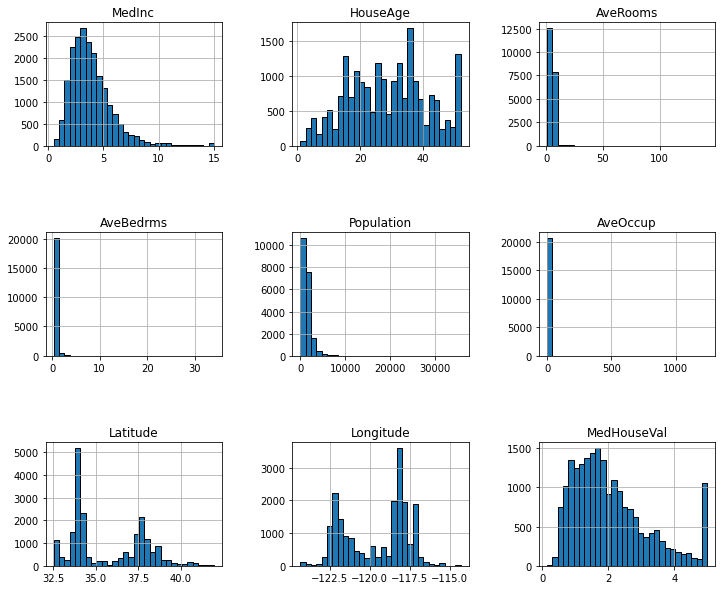

In [ ]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
## Standard the features
X, y = california_housing.data, california_housing.target

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
## double-check the feature
print(X.mean(axis=0))
print(X.std(axis=0))

[ 6.60969987e-17  5.50808322e-18  6.60969987e-17 -1.06030602e-16
 -1.10161664e-17  3.44255201e-18 -1.07958431e-15 -8.52651283e-15]
[1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
## create training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Make prediction based on **kNN regression** `sklearn.neighbors.KNeighborsRegressor`

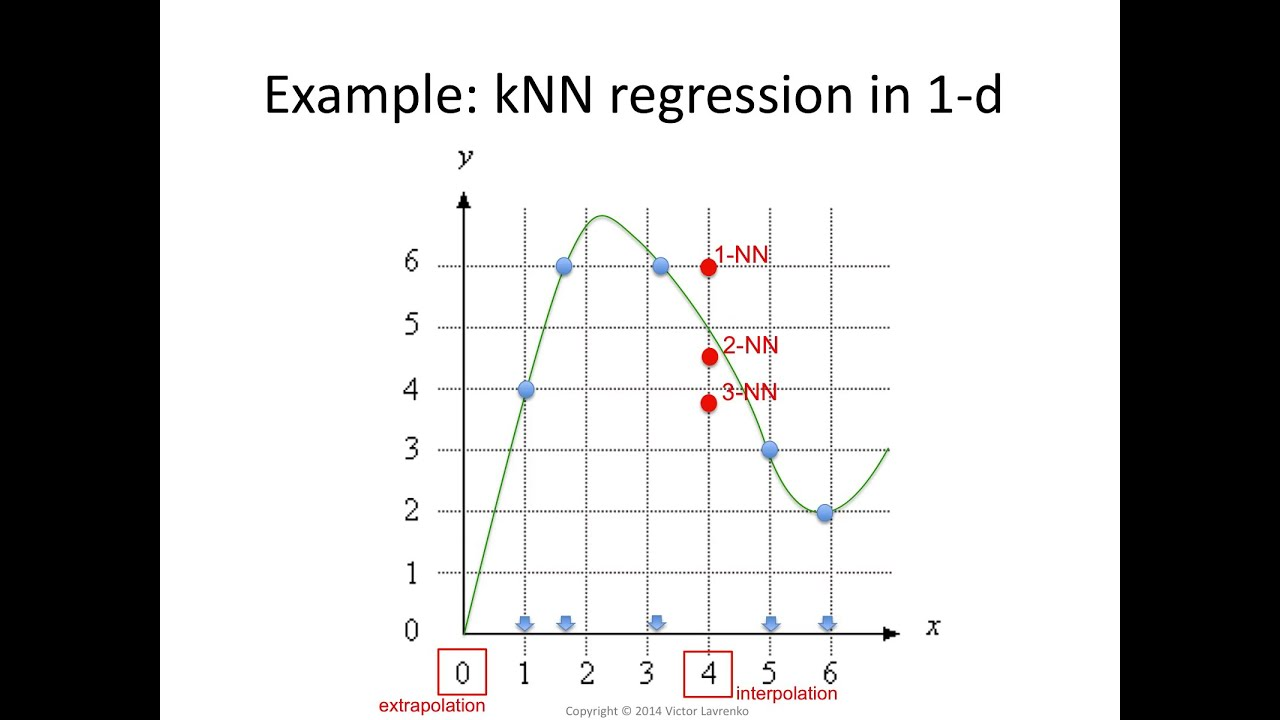

In [ ]:
## kNN regression (training) 
from sklearn.neighbors import KNeighborsRegressor
for k in [1, 5, 10, 20, 50, 100]:
  print('##### %d-NN regression #####' %k)
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train, y_train)

  y_pred_train = neigh.predict(X_train)
  mse_train = np.mean((y_pred_train - y_train)**2)

  ## kNN regression (prediction)
  y_pred = neigh.predict(X_test)
  mse_test = np.mean((y_pred - y_test)**2)
  print('train_mse: %.3f; test_mse: %.3f' %(mse_train, mse_test))

##### 1-NN regression #####
train_mse: 0.000; test_mse: 0.670
##### 5-NN regression #####
train_mse: 0.273; test_mse: 0.434
##### 10-NN regression #####
train_mse: 0.330; test_mse: 0.420
##### 20-NN regression #####
train_mse: 0.373; test_mse: 0.424
##### 50-NN regression #####
train_mse: 0.420; test_mse: 0.446
##### 100-NN regression #####
train_mse: 0.453; test_mse: 0.469


## **Overfitting** VS. **underfitting**

- When k 📈 => train mse 📉 && test mse 📉 + 📈



## Use **Cross-validation** to find the optimal hyperparameters
- The number of neighbors in kNN model is a hyperparamter
- The weight for the l2 penality in ridge regression is a hyperparamter

### Further split **train set** into **train set** and **valid set**

In [ ]:
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

### Cross-validation for `KNeighborsRegressor`



In [ ]:
## Cross-validation
valid_mse_lst = []
candidate_k = [1, 5, 10, 20, 50, 100]
for k in candidate_k:
  neigh = KNeighborsRegressor(n_neighbors=k)
  neigh.fit(X_train_sub, y_train_sub)

  y_pred_train = neigh.predict(X_train_sub)
  mse_train = np.mean((y_pred_train - y_train_sub)**2)

  ## kNN regression (validation)
  y_pred = neigh.predict(X_valid)
  mse_valid = np.mean((y_pred - y_valid)**2)
  print('k: %d; train_mse: %.3f; valid_mse: %.3f' %(k, mse_train, mse_valid))
  valid_mse_lst.append(mse_valid)
valid_mse_lst = np.array(valid_mse_lst)

k: 1; train_mse: 0.000; valid_mse: 0.648
k: 5; train_mse: 0.287; valid_mse: 0.435
k: 10; train_mse: 0.345; valid_mse: 0.426
k: 20; train_mse: 0.387; valid_mse: 0.433
k: 50; train_mse: 0.436; valid_mse: 0.457
k: 100; train_mse: 0.474; valid_mse: 0.487


- Find the optimal k which minimizes the validation MSE

In [ ]:
optimal_k = candidate_k[np.argmin(valid_mse_lst)]
print('the optimal k determined by cross-validation is %d' %optimal_k)

the optimal k determined by cross-validation is 10


- Refit the whole dataset with **optimal** hyperparameter

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=optimal_k)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

- Predict `X_test` based on the model fitted with the optimal hyperparameter

In [ ]:
## kNN regression (prediction)
y_pred = neigh.predict(X_test)
mse_test = np.mean((y_pred - y_test)**2)
print('test_mse: %.3f' %mse_test)

test_mse: 0.420


### Cross-validation for `sklearn.linear_model.Ridge`
- ||y - Xw||^2_2 + alpha * ||w||^2_2
- The hyperparameter is *norm of linear coefficients*, i.e., control the magnitude of the parameters to control the *model complexity*
- Some rules to select your **Grid**

In [ ]:
from sklearn.linear_model import Ridge
candidate_alpha = [.5, 1, 10, 50, 100, 1000]
valid_mse_lst = []

for alpha in candidate_alpha:
  clf = Ridge(alpha=alpha)
  clf.fit(X_train_sub, y_train_sub)

  y_pred_train = clf.predict(X_train_sub)
  mse_train = np.mean((y_pred_train - y_train_sub)**2)

  y_pred = clf.predict(X_valid)
  mse_valid = np.mean((y_pred - y_valid)**2)
  print('alpha: %.1f; train_mse: %.3f; valid_mse: %.4f' %(alpha, mse_train, mse_valid))
  valid_mse_lst.append(mse_valid)

alpha: 0.5; train_mse: 0.519; valid_mse: 0.5231
alpha: 1.0; train_mse: 0.519; valid_mse: 0.5231
alpha: 10.0; train_mse: 0.519; valid_mse: 0.5230
alpha: 50.0; train_mse: 0.520; valid_mse: 0.5233
alpha: 100.0; train_mse: 0.522; valid_mse: 0.5246
alpha: 1000.0; train_mse: 0.575; valid_mse: 0.5784


In [ ]:
optimal_alpha = candidate_alpha[np.argmin(valid_mse_lst)]
print('the optimal alpha determined by cross-validation is %d' %optimal_alpha)

the optimal alpha determined by cross-validation is 10


In [ ]:
clf = Ridge(alpha=optimal_alpha)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
mse_test = np.mean((y_pred - y_test)**2)
print('test_mse: %.3f' %mse_test)

test_mse: 0.537


## k-Fold Cross Validation

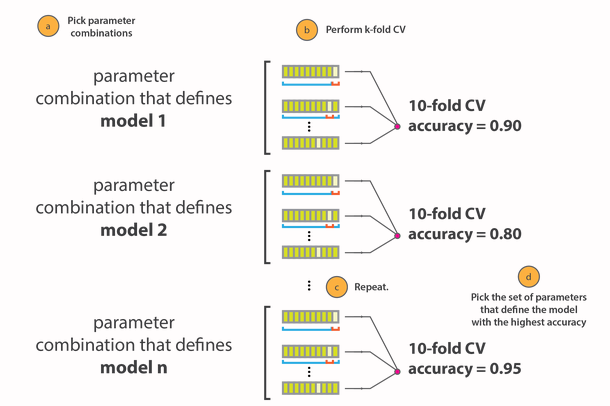

### Homework

- Program 5-fold Cross-validation based on `fetch_california_housing` dataset for kNN regression and ridge regression.